# Plot Sparse Basic Info and Demo Examples

### basic info

In [1]:
from sparse_tools import *
from survey_params import *

s_par = survey1_param()
dth = s_par.dth
nu_binedges = s_par.nu_binedges
nu_bins = s_par.nu_bins
line_use = [0,2,3,4,5,6]
line_name_arr = [r'$CII$', r'$CO(2-1)$', r'$CO(3-2)$', r'$CO(4-3)$', r'$CO(5-4)$', r'$CO(6-5)$']
nu0_arr = [spec_lines.CII.to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(2).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(3).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(4).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(5).to(u.GHz, equivalencies=u.spectral()).value,\
           spec_lines.CO(6).to(u.GHz, equivalencies=u.spectral()).value]
line_targ_vec = line_use

### Plot Neff

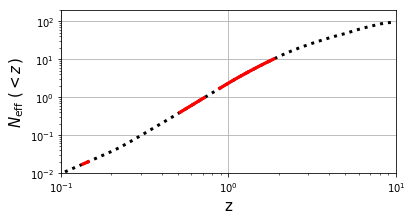

In [2]:
# from sparse_tools import *
# from survey_params import *

# s_par = survey1_param()

# fig, ax = plt.subplots(1,1, figsize = (6,3))

# df = pd.read_csv('data_internal/P16NeffLs.txt')
# z_dat = df['z'].values
# Neff_dat = df['CO10_Neff'].values
# Neff_dat[z_dat > 5] = df['CII_Neff'].values[z_dat > 5]
# Neff_dat = Neff_dat * (s_par.dth)**2

# z_binedges = np.arange(0,10.01,0.01)
# z_bins = (z_binedges[:-1] + z_binedges[1:]) / 2
# Neff_bins = np.interp(z_bins, z_dat, Neff_dat)
# ax.plot(z_bins, np.cumsum(Neff_bins) * 0.01, 'k:', lw = 3)

# line_use = [0,2,3,4,5,6]
# zbounds = []
# for j in line_use:
#     inband, z_binedges = accessible_bands(s_par.nu_binedges, line_use, j)

#     pt1 = -1
#     pt2 = -1
#     ptc = 0
#     while ptc < len(inband):
#         if inband[ptc] and pt1 != -1:
#             pt2 = ptc
#         if inband[ptc] and pt1 == -1:
#             pt1 = ptc
#             pt2 = ptc
#         if not inband[ptc] and pt1 !=-1:
#             zbounds.append([z_binedges[pt1], z_binedges[pt2 + 1]])
#             pt1 = -1
#             pt2 = -1
#         ptc += 1

#     if pt1 != -1:
#         zbounds.append([z_binedges[pt1], z_binedges[pt2 + 1]])

# for zmin,zmax in zbounds:
#     sp = np.where((z_bins > zmin) & (z_bins < zmax))
#     xsp = z_bins[sp]
#     ysp = np.cumsum(Neff_bins) * 0.01
#     ysp = ysp[sp]
#     ax.plot(xsp, ysp, 'r', lw = 3)

# ax.set_ylabel(r'$N_{\rm eff}\,\,(< z\,)$', fontsize = 15)
# ax.set_xlabel('z', fontsize = 15)
# ax.tick_params(axis='both', which='major', labelsize=10)
# ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_xlim([1e-1,10])
# ax.set_ylim([1e-2,2e2])
# ax.grid()

# plt.savefig('plots/paperfig/Neff.pdf', bbox_inches = 'tight', dpi = 300)

### print out zmin, zmax, $<z>$ for each bands

In [58]:
for jtarg in [3,4,5,6]:
    idx_vec, z_min_vec, z_max_vec, name_vec = survey_band_bins(jtarg, 'survey1')
    for name, zmin, zmax, idx in zip(name_vec, z_min_vec, z_max_vec, idx_vec):
        print('%s, %d channels, %.2f < z < %.2f'%(name,len(idx), zmin, zmax))

J3 high, 19 channels, 0.51 < z < 0.72
J4 low, 25 channels, 0.51 < z < 0.72
J4 high, 29 channels, 0.89 < z < 1.30
J5 low, 37 channels, 0.88 < z < 1.30
J5 high, 33 channels, 1.30 < z < 1.87
J6 low, 43 channels, 1.26 < z < 1.87


### Plot $\widetilde{A}$

skip this cell

=================

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


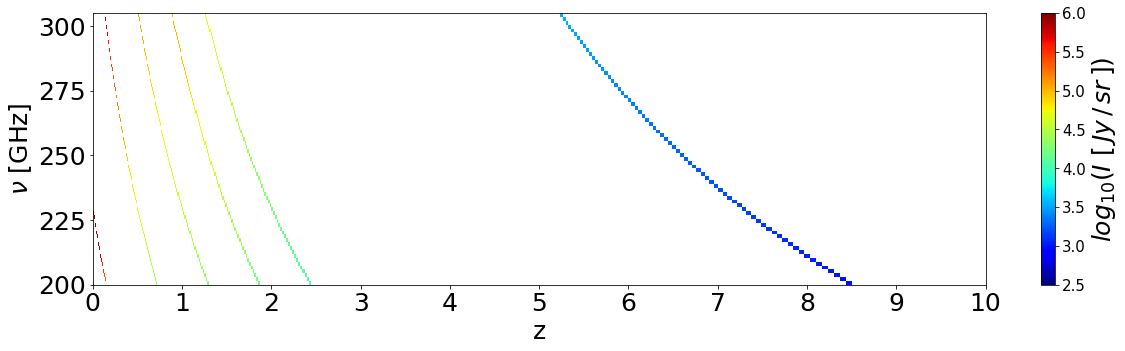

In [15]:
_, _, _, _, _, _, z_coords_all1, _, I_coords_all1 = sparse_dict(dth, nu_binedges, line_use, dz = 0.001)

fig = plt.figure(figsize=(20,5))
ext = [z_coords_all1[0], z_coords_all1[-1], nu_binedges[-1], nu_binedges[0]]
plt.imshow(np.log10(I_coords_all1), extent = ext, aspect='auto', vmin = 2.5, vmax = 6, cmap = 'jet')
cbar = plt.colorbar()
cbar.set_label(r'$log_{10}(I\,\,[\,Jy\, /\, sr\,])$', fontsize = 25)
cbar.ax.tick_params(labelsize=15) 
plt.xticks(np.arange(11))
plt.xlabel('z',fontsize=25)
plt.ylabel(r'$\nu$ [GHz]',fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)

plt.savefig('plots/paperfig/A_raw.pdf', bbox_inches = 'tight', dpi = 200)

/Users/ytcheng/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in log10


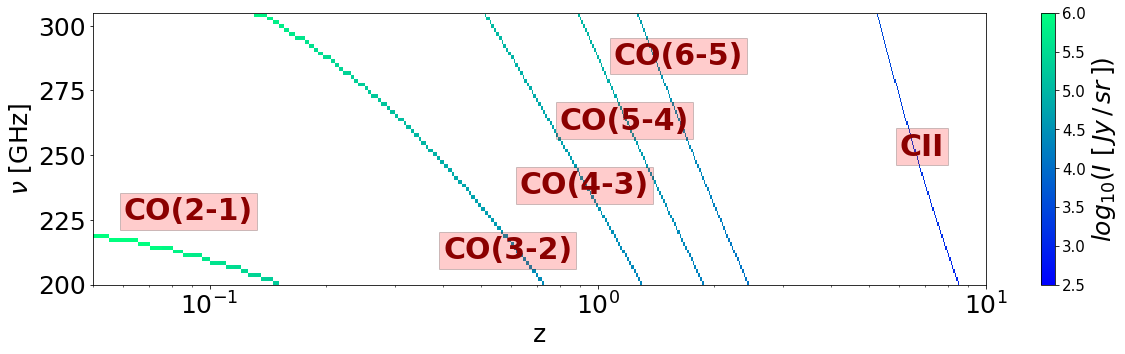

In [71]:
# _, _, _, _, _, _, z_coords_all1, _, I_coords_all1 = sparse_dict(dth, nu_binedges, line_use, dz = 0.005)

# fig = plt.figure(figsize=(20,5))
# ext = [z_coords_all1[0], z_coords_all1[-1], nu_binedges[-1], nu_binedges[0]]
# plt.imshow(np.log10(I_coords_all1), extent = ext, aspect='auto', vmin = 2.5, vmax = 6, cmap = 'winter')
# cbar = plt.colorbar()
# cbar.set_label(r'$log_{10}(I\,\,[\,Jy\, /\, sr\,])$', fontsize = 25)
# cbar.ax.tick_params(labelsize=15) 
# plt.xticks(np.arange(11))
# plt.xlabel('z',fontsize=25)
# plt.ylabel(r'$\nu$ [GHz]',fontsize=25)
# plt.tick_params(axis='both', which='major', labelsize=25)
# plt.xscale('log')
# plt.xlim([5e-2,1e1])
# plt.text(0.06,225,'CO(2-1)',fontweight='bold',fontsize=30, color='Darkred', bbox=dict(facecolor='red',alpha=0.2, edgecolor='k'))
# plt.text(0.4,210,'CO(3-2)',fontweight='bold',fontsize=30, color='Darkred', bbox=dict(facecolor='red',alpha=0.2, edgecolor='k'))
# plt.text(0.63,235,'CO(4-3)',fontweight='bold',fontsize=30, color='Darkred', bbox=dict(facecolor='red',alpha=0.2, edgecolor='k'))
# plt.text(0.8,260,'CO(5-4)',fontweight='bold',fontsize=30, color='Darkred', bbox=dict(facecolor='red',alpha=0.2, edgecolor='k'))
# plt.text(1.1,285,'CO(6-5)',fontweight='bold',fontsize=30, color='Darkred', bbox=dict(facecolor='red',alpha=0.2, edgecolor='k'))
# plt.text(6,250,'CII',fontweight='bold',fontsize=30, color='Darkred', bbox=dict(facecolor='red',alpha=0.2, edgecolor='k'))

# plt.savefig('plots/slidesfig/A_raw.pdf', bbox_inches = 'tight', dpi = 200)

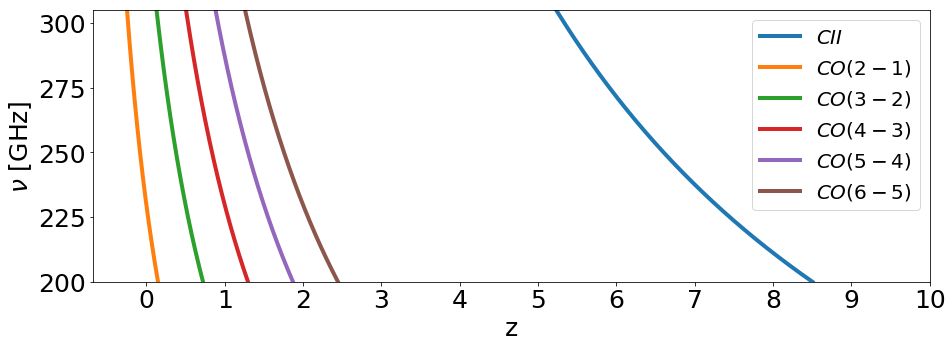

In [16]:
fig = plt.figure(figsize=(15,5))
nu_obs_arr = np.linspace(s_par.nu_min, s_par.nu_max,1000)

for jco, (name, nu0) in enumerate(zip(line_name_arr, nu0_arr)):
    zobs_arr = nu0/nu_obs_arr - 1
    plt.plot(zobs_arr, nu_obs_arr, lw = 4, label = name)
    
cbar.ax.tick_params(labelsize=15) 
plt.ylim([s_par.nu_min,s_par.nu_max])
plt.legend(fontsize=20)
plt.xticks(np.arange(11))
plt.xlabel('z',fontsize=25)
plt.ylabel(r'$\nu$ [GHz]',fontsize=25)
plt.tick_params(axis='both', which='major', labelsize=25)

plt.savefig('plots/slidesfig/A_raw1.pdf', bbox_inches = 'tight', dpi = 300)

=================

### Run Sparse Dict

skip this cell

=================

In [2]:
# A, I_norm, z_coords, N_nu, N_z, sp2, z_coords_all, z_idx, I_coords_all \
# = sparse_dict(dth, nu_binedges, line_use)

# with open('data_internal/sparse_S1_dict.pickle','wb') as pfile:
#     pickle.dump([A, I_norm, z_coords, N_nu, N_z, sp2, z_coords_all, z_idx, I_coords_all],pfile)

=================

In [3]:
with open('data_internal/sparse_S1_dict.pickle','rb') as pfile:
    A, I_norm, z_coords, N_nu, N_z, sp2, z_coords_all, z_idx, I_coords_all = pickle.load(pfile)

### Plot $A$

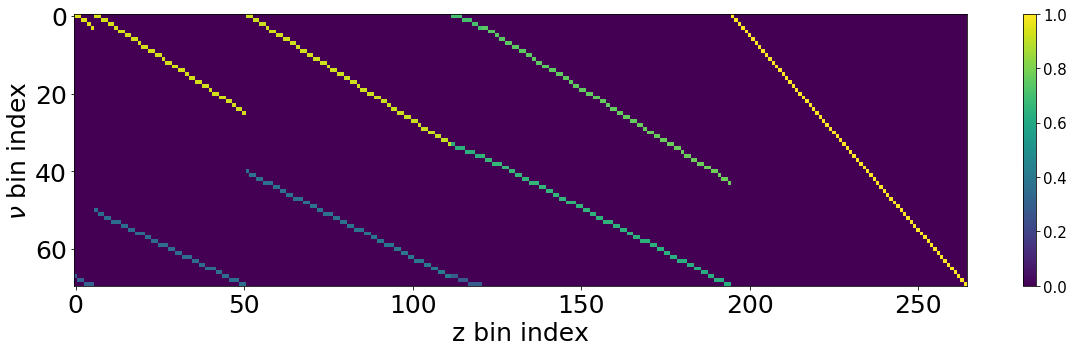

In [14]:
fig = plt.figure(figsize=(20,5))
plt.imshow(A, aspect='auto', vmin = 0, vmax = 1)
plt.xlabel('z bin index',fontsize=25)
plt.ylabel(r'$\nu$ bin index',fontsize = 25)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=15) 
plt.tick_params(axis='both', which='major', labelsize=25)

# plt.savefig('plots/paperfig/A.pdf', bbox_inches = 'tight', dpi = 300)

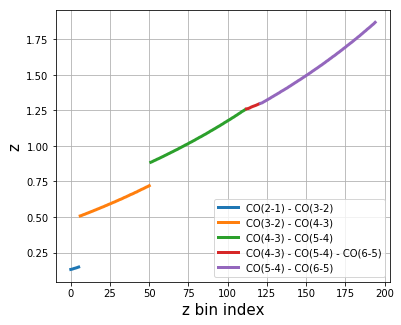

In [13]:
import collections

j_dict = collections.OrderedDict()
for i,z in enumerate(z_coords[sp2]):
    nu_obs = np.array(nu0_arr) / (1+z)
    key = np.array(line_targ_vec)[(nu_obs < s_par.nu_max) & (nu_obs > s_par.nu_min)]
    key = tuple(key)    
    if key in j_dict:
        j_dict[key].append(i)
    else:
        j_dict[key] = [i]

fig, ax = plt.subplots(1,1, figsize = (6,5))
for jpair, idx in j_dict.items():
    print_name = 'CO(' + str(jpair[0]) + '-' + str(jpair[0]-1) + ')' \
    + ' - ' + 'CO(' + str(jpair[1]) + '-' + str(jpair[1]-1) + ')'
    if len(jpair) == 3:
        print_name = print_name + ' - ' + 'CO(' + str(jpair[2]) + '-' + str(jpair[2]-1) + ')'
    z_coords2 = z_coords[sp2]
    ax.plot(idx, z_coords2[idx], lw = 3, label = print_name)

ax.set_xlabel('z bin index', fontsize = 15)
ax.set_ylabel('z', fontsize = 15)
ax.legend(loc = 4, fontsize = 10)
ax.grid()
# plt.savefig('plots/paperfig/zbins.pdf', bbox_inches = 'tight', dpi = 300)

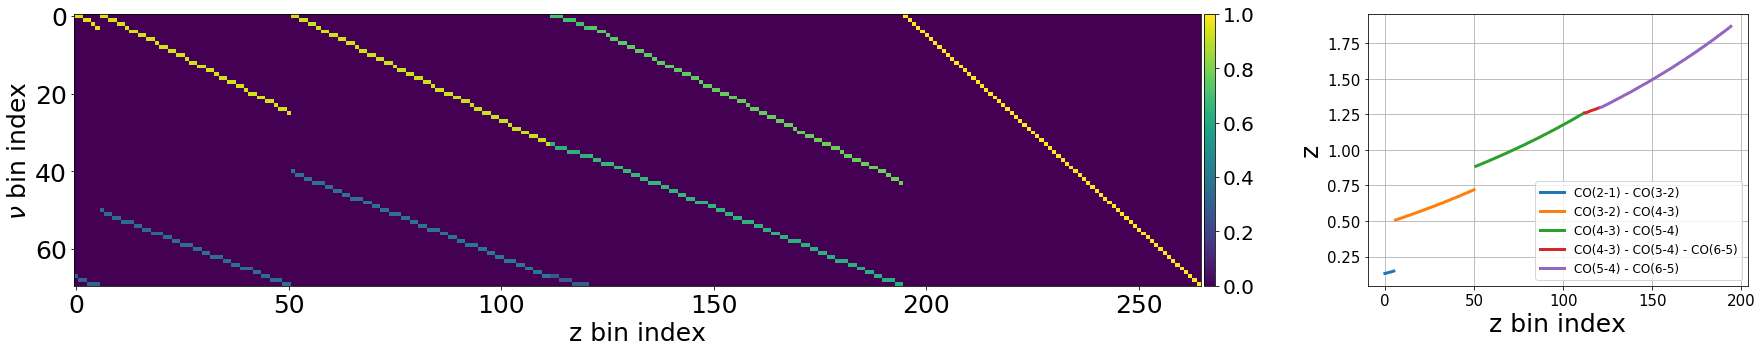

In [50]:
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(30, 5)) 
gs = gridspec.GridSpec(1, 2, width_ratios=[3,1]) 
ax0 = plt.subplot(gs[0])
ax1 = plt.subplot(gs[1])

img = ax0.imshow(A, aspect='auto', vmin = 0, vmax = 1)
ax0.set_xlabel('z bin index',fontsize=25)
ax0.set_ylabel(r'$\nu$ bin index',fontsize = 25)
divider = make_axes_locatable(ax0)
cax2 = divider.append_axes("right", size="1%", pad=0.05)
cbar = fig.colorbar(img, cax=cax2)
cbar.ax.tick_params(labelsize=20) 
ax0.tick_params(axis='both', which='major', labelsize=25)

import collections

j_dict = collections.OrderedDict()
for i,z in enumerate(z_coords[sp2]):
    nu_obs = np.array(nu0_arr) / (1+z)
    key = np.array(line_targ_vec)[(nu_obs < s_par.nu_max) & (nu_obs > s_par.nu_min)]
    key = tuple(key)    
    if key in j_dict:
        j_dict[key].append(i)
    else:
        j_dict[key] = [i]

for jpair, idx in j_dict.items():
    print_name = 'CO(' + str(jpair[0]) + '-' + str(jpair[0]-1) + ')' \
    + ' - ' + 'CO(' + str(jpair[1]) + '-' + str(jpair[1]-1) + ')'
    if len(jpair) == 3:
        print_name = print_name + ' - ' + 'CO(' + str(jpair[2]) + '-' + str(jpair[2]-1) + ')'
    z_coords2 = z_coords[sp2]
    ax1.plot(idx, z_coords2[idx], lw = 3, label = print_name)

ax1.set_xlabel('z bin index', fontsize = 25)
ax1.set_ylabel('z', fontsize = 25)
ax1.legend(loc = 4, fontsize = 12)
ax1.tick_params(axis='both', which='major', labelsize=15)
ax1.grid()
plt.savefig('plots/paperfig/A_zbins.pdf', bbox_inches = 'tight', dpi = 300)

# Plot L* source I 

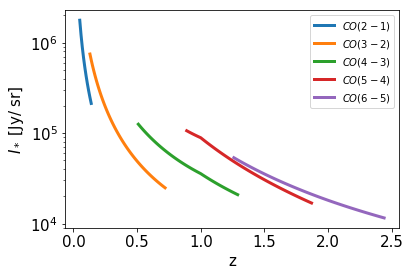

In [107]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
for j in [2,3,4,5,6]:
    z_arr = []
    I_arr = []
    for z in np.arange(0.05,2.5,0.01):
        I_vec_all,I_vec_targ = Ivox_from_zsrc([[z]], dth, nu_binedges, line_use, [j])
        if len(I_vec_targ[I_vec_targ!=0]) > 0:
            z_arr.append(z)
            I_arr.append(I_vec_targ[I_vec_targ!=0])
    ax.plot(z_arr, I_arr, label = line_name_arr[line_use.index(j)], lw = 3)
ax.set_yscale('log')
ax.set_xlabel('z', fontsize = 15)
ax.set_ylabel(r'$I_*$ [Jy/ sr]', fontsize = 15)
ax.legend(loc = 1, fontsize = 10)
ax.tick_params(axis='both', which='major', labelsize=15)

plt.savefig('plots/paperfig/Istr.pdf', bbox_inches = 'tight', dpi = 300)

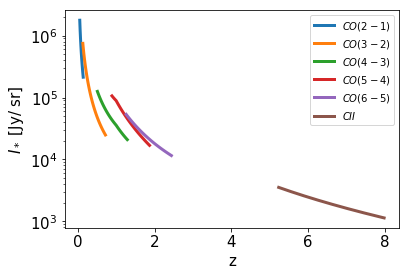

In [74]:
fig, ax = plt.subplots(1,1, figsize = (6,4))
for j in [2,3,4,5,6,0]:
    z_arr = []
    I_arr = []
    for z in np.arange(0.05,8,0.01):
        I_vec_all,I_vec_targ = Ivox_from_zsrc([[z]], dth, nu_binedges, line_use, [j])
        if len(I_vec_targ[I_vec_targ!=0]) > 0:
            z_arr.append(z)
            I_arr.append(I_vec_targ[I_vec_targ!=0])
    ax.plot(z_arr, I_arr, label = line_name_arr[line_use.index(j)], lw = 3)
ax.set_yscale('log')
ax.set_xlabel('z', fontsize = 15)
ax.set_ylabel(r'$I_*$ [Jy/ sr]', fontsize = 15)
ax.legend(loc = 1, fontsize = 10)
ax.tick_params(axis='both', which='major', labelsize=15)

# plt.savefig('plots/paperfig/Istr.pdf', bbox_inches = 'tight', dpi = 300)

# Plot example Reconstruction

source redshifts: [0.5375 1.06   1.2035 1.241  1.792  1.821 ]
14 0.5415
37 0.6509999999999999
109 1.2409999999999999
224 0.762 (nuisance)


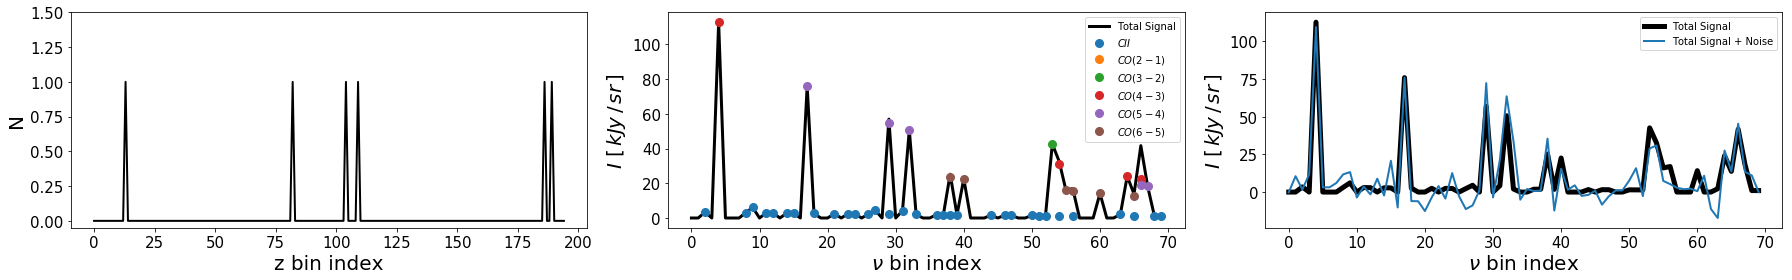

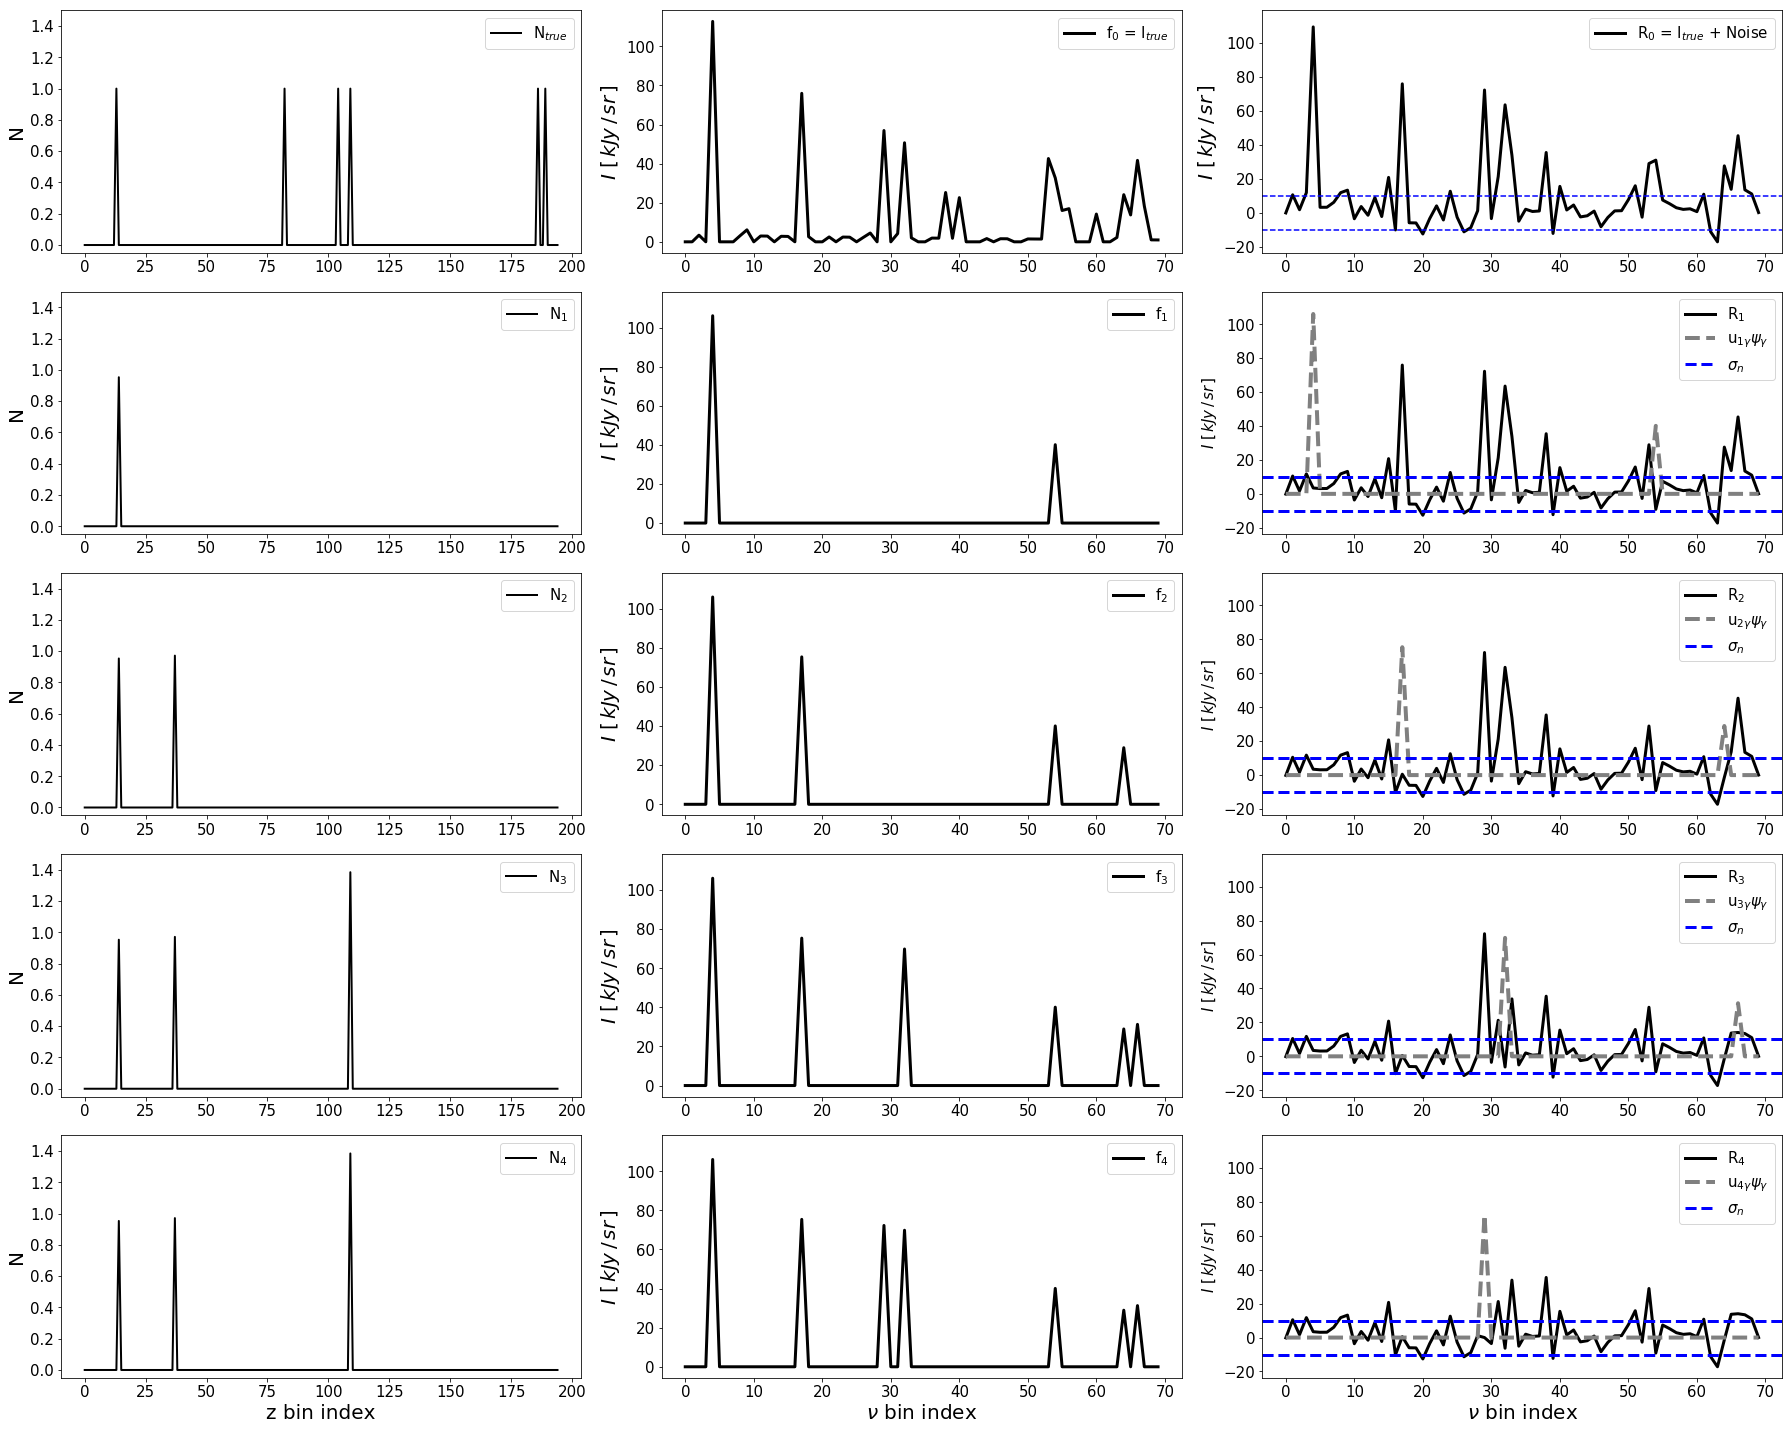

In [25]:
from sparse_tools import *
from survey_params import *

sigI = 1e4
sig_th = 5
count = 0
while True:
    count += 1
    N_true, Itrue_all, Itrue_targ \
       = gen_lightcone_toy(1, dth, nu_binedges, sp2, z_coords_all, I_coords_all,\
                           z_idx, line_use, line_targ_vec)

    Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
    Itrue_targ = np.mean(Itrue_targ, axis = 1)

    _,iter_count = run_MP_sig(A, I_norm, Iobs_all, \
                              sigI, sig_th, iter_max = 100, return_iter = True)

    if iter_count == 4 and np.sum(N_true) <= 6 and np.sum(N_true) > 4:
        break

N_true = N_true.flatten()
Itrue_all = Itrue_all.flatten()
Iobs_all = Iobs_all.flatten()
print('source redshifts:', z_coords[sp2][N_true != 0])

fig, ax = plt.subplots(1,3, figsize = (25,4))

ax[0].plot(N_true, 'k', lw = 2)
ax[0].set_xlabel('z bin index', fontsize = 20)
ax[0].set_ylabel('N', fontsize = 20)
ax[0].set_ylim([-0.05, 1.5])
ax[0].tick_params(axis='both', which='major', labelsize=15)

ax[1].plot(Itrue_all / 1000, 'k-', lw = 3, label = 'Total Signal')
for i in range(len(line_use)):
    sp = np.where(Itrue_targ[i,:] != 0)[0]
    ax[1].plot(np.arange(N_nu)[sp],Itrue_targ[i,sp] / 1000,
               'o', label = line_name_arr[i], markersize = 8)
ax[1].legend(loc = 0)
ax[1].set_xlabel(r'$\nu$ bin index', fontsize = 20)
ax[1].set_ylabel(r'$I\,\,[\,kJy\, /\, sr\,]$', fontsize = 20)
ax[1].tick_params(axis='both', which='major', labelsize=15)


ax[2].plot(Itrue_all / 1000,'k-', lw = 5, label = 'Total Signal')
ax[2].plot(Iobs_all / 1000,'-', lw = 2, label = 'Total Signal + Noise')
ax[2].legend(loc = 0)
ax[2].set_xlabel(r'$\nu$ bin index', fontsize = 20)
ax[2].set_ylabel(r'$I\,\,[\,kJy\, /\, sr\,]$', fontsize = 20)
ax[2].tick_params(axis='both', which='major', labelsize=15)

ylim0 = ax[0].get_ylim()
ylim1 = ax[1].get_ylim()
ylim2 = ax[2].get_ylim()
fig.tight_layout()
plt.savefig('plots/paperfig/toy_lc.pdf', bbox_inches = 'tight', dpi = 300)

# MP step-by-step (toy)
fig, ax = plt.subplots(5, 3, figsize = (25, 20))
ax[0][0].plot(N_true, 'k', lw = 2, label = 'N$_{true}$')
ax[0][0].set_ylabel('N', fontsize = 20)
ax[0][0].set_ylim(ylim0)
ax[0][0].tick_params(axis='both', which='major', labelsize=15)
ax[0][0].legend(loc = 0, fontsize = 15)

ax[0][1].plot(Itrue_all / 1000, 'k-', lw = 3, label = r'f$_0$ = I$_{true}$')
ax[0][1].set_ylabel(r'$I\,\,[\,kJy\, /\, sr\,]$', fontsize = 20)
ax[0][1].set_ylim(ylim1)
ax[0][1].tick_params(axis='both', which='major', labelsize=15)
ax[0][1].legend(loc = 0, fontsize = 15)

ax[0][2].plot(Iobs_all / 1000,'k-', lw = 3, label = r'R$_0$ = I$_{true}$ + Noise')
line = ax[0][2].axhline(sigI / 1000, ls = '--', c = 'b')
ax[0][2].axhline(-sigI / 1000, ls = '--', c = line.get_color())
ax[0][2].set_ylabel(r'$I\,\,[\,kJy\, /\, sr\,]$', fontsize = 20)
ax[0][2].set_ylim(ylim2)
ax[0][2].tick_params(axis='both', which='major', labelsize=15)
ax[0][2].legend(loc = 1, fontsize = 15)

R_arr = Iobs_all.copy()
f_arr = np.zeros(N_nu)
NI_arr = np.zeros(N_z)
iter_count = 0
iter_max = 100

while True:
    if iter_count == iter_max:
        break
    iter_count += 1
    gamma = np.argmax(np.dot(R_arr.reshape(1,-1), A)[0])
    amp = np.sum(A[:,gamma] * R_arr)
    if amp < sig_th * sigI:
        break
    u_arr = amp * A[:,gamma]
    NI_arr[gamma] += amp
    R_arr -= u_arr
    f_arr += u_arr
    R = np.sqrt(np.mean(R_arr**2))
    
    if gamma < len(sp2):
        print(gamma, z_coords[gamma])
    else:
        print(gamma, z_coords[gamma], '(nuisance)')
    
    ax[iter_count][0].plot(NI_arr[sp2] / I_norm[sp2], 'k', lw = 2, label = 'N$_{%d}$'%iter_count)
    ax[iter_count][0].set_ylim(ylim0)
    ax[iter_count][0].set_ylabel('N', fontsize = 20)
    ax[iter_count][0].tick_params(axis='both', which='major', labelsize=15)
    ax[iter_count][0].legend(loc = 0, fontsize = 15)
    
    ax[iter_count][1].plot(f_arr / 1000, 'k-', lw = 3, label = 'f$_{%d}$'%iter_count)
    ax[iter_count][1].set_ylim(ylim1)
    ax[iter_count][1].set_ylabel(r'$I\,\,[\,kJy\, /\, sr\,]$', fontsize = 20)
    ax[iter_count][1].tick_params(axis='both', which='major', labelsize=15)
    ax[iter_count][1].legend(loc = 0, fontsize = 15)

    ax[iter_count][2].plot(R_arr / 1000,'k-', lw = 3, label = 'R$_{%d}$'%iter_count)
    ax[iter_count][2].plot(u_arr / 1000,'--', c = 'gray', lw = 4, 
                           label = 'u$_{%d\gamma}\psi_\gamma$'%iter_count)
    ax[iter_count][2].set_ylim(ylim2)
    ax[iter_count][2].axhline(sigI / 1000, ls = '--', c = line.get_color(), 
                              lw = 3, label = r'$\sigma_n$')
    ax[iter_count][2].axhline(-sigI / 1000, ls = '--', c = line.get_color(), lw = 3)
    ax[iter_count][2].set_ylabel(r'$I\,\,[\,kJy\, /\, sr\,]$', fontsize = 15)
    ax[iter_count][2].tick_params(axis='both', which='major', labelsize=15)
    ax[iter_count][2].legend(loc = 1, fontsize = 15)
    
ax[iter_count-1][0].set_xlabel('z bin index', fontsize = 20)
ax[iter_count-1][1].set_xlabel(r'$\nu$ bin index', fontsize = 20)
ax[iter_count-1][2].set_xlabel(r'$\nu$ bin index', fontsize = 20)

fig.tight_layout()

plt.savefig('plots/paperfig/MP_steps.pdf', bbox_inches = 'tight', dpi = 300)

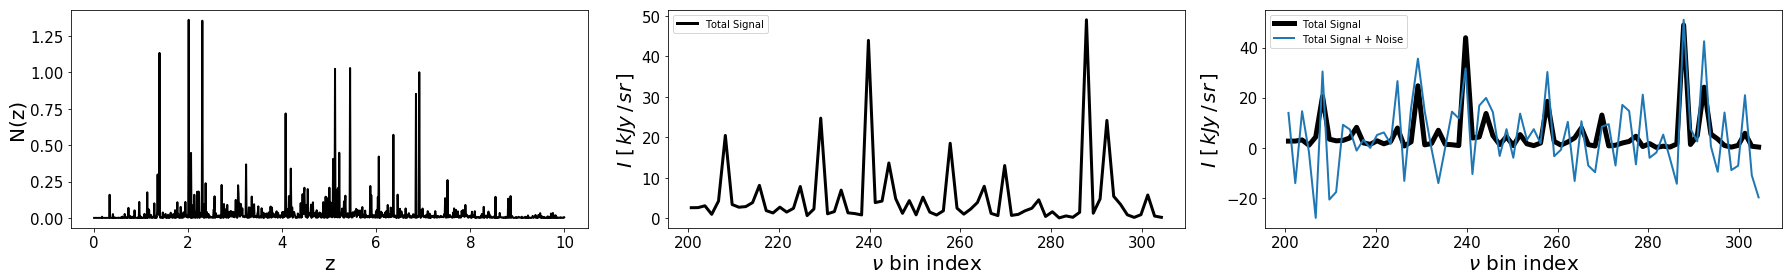

In [94]:
from sparse_tools import *
from survey_params import *

def gen_lightcone1(Nlc, dth, nu_binedges, sp2, z_coords_all, I_coords_all,
                  z_idx, juse, jtarg, Neff_scale = 1, sigL = []):

    L_arr1, N_arr1, zbins = sim_Llc_P16(Nlc, dth, jco = 1, Neff_scale = Neff_scale)
    L_arr2, N_arr2, zbins = sim_Llc_P16(Nlc, dth, jco = 0, Neff_scale = Neff_scale)
    L_arr, N_arr= L_arr1, N_arr1
    L_arr[:, zbins > 5] = L_arr2[:, zbins > 5]
    N_arr[:, zbins > 5] = N_arr2[:, zbins > 5]
    zsrc = [zbins.tolist()]*Nlc
    Itrue_all, Itrue_targ = Ivox_from_zsrc(zsrc, dth, nu_binedges, juse, jtarg, 
                                           Lratio = N_arr.tolist(), sigL = sigL, verbose=0)
    Nsrc = N_arr.tolist()
    Ntrue = zlist_to_N(zsrc, z_coords_all, I_coords_all, z_idx, sp2, Nsrc = Nsrc)
    Ntrue = Ntrue[:,sp2]
    return Ntrue, Itrue_all, Itrue_targ, zsrc, Nsrc


sigI = 1e4
N_true, Itrue_all, Itrue_targ, zsrc, Nsrc \
   = gen_lightcone1(1, dth, nu_binedges, sp2, z_coords_all, I_coords_all,\
                       z_idx, line_use, line_targ_vec)

Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
Itrue_targ = np.mean(Itrue_targ, axis = 1)

N_true = N_true.flatten()
Itrue_all = Itrue_all.flatten()
Iobs_all = Iobs_all.flatten()

fig, ax = plt.subplots(1,3, figsize = (25,4))

ax[0].plot(zsrc[0], Nsrc[0], 'k', lw=2)
ax[0].set_xlabel('z', fontsize = 20)
ax[0].set_ylabel('N(z)', fontsize = 20)
ax[0].tick_params(axis='both', which='major', labelsize=15)

ax[1].plot(s_par.nu_bins, Itrue_all / 1000, 'k-', lw = 3, label = 'Total Signal')
# for i in range(len(line_use)):
#     sp = np.where(Itrue_targ[i,:] > 3000)[0]
#     ax[1].plot(s_par.nu_bins[sp],Itrue_targ[i,sp] / 1000,
#                'o', label = line_name_arr[i], markersize = 8)
ax[1].legend(loc = 0)
ax[1].set_xlabel(r'$\nu$ bin index', fontsize = 20)
ax[1].set_ylabel(r'$I\,\,[\,kJy\, /\, sr\,]$', fontsize = 20)
ax[1].tick_params(axis='both', which='major', labelsize=15)


ax[2].plot(s_par.nu_bins,Itrue_all / 1000,'k-', lw = 5, label = 'Total Signal')
ax[2].plot(s_par.nu_bins,Iobs_all / 1000,'-', lw = 2, label = 'Total Signal + Noise')
ax[2].legend(loc = 0)
ax[2].set_xlabel(r'$\nu$ bin index', fontsize = 20)
ax[2].set_ylabel(r'$I\,\,[\,kJy\, /\, sr\,]$', fontsize = 20)
ax[2].tick_params(axis='both', which='major', labelsize=15)

ylim0 = ax[0].get_ylim()
ylim1 = ax[1].get_ylim()
ylim2 = ax[2].get_ylim()
fig.tight_layout()
plt.savefig('plots/paperfig/gen_lc.pdf', bbox_inches = 'tight', dpi = 300)

# X-corr Error argument

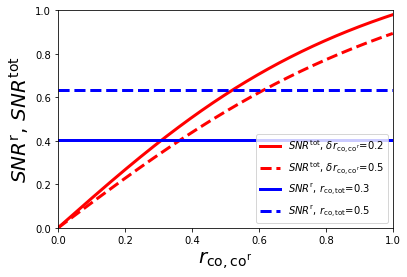

In [54]:
r_cocor = np.arange(0.001,1.001,0.001)
for delr_cocor,ls in zip([0.2, 0.5],['-', '--']):
    SNRr = 1/np.sqrt(0.5*(1 + 1/r_cocor**2) + (delr_cocor/r_cocor)**2)
    plt.plot(r_cocor, SNRr, 'r', ls=ls, lw=3,
             label = r'$SNR^{\rm tot}$, $\delta r_{\rm co,co^{r}}$=%.1f'%delr_cocor)
    
for (r_cotot,ls) in zip([0.3, 0.5], ['-','--']):
    SNRtot = 1/np.sqrt(0.5*(1 + 1/r_cotot**2))
    plt.plot([0, 1], [SNRtot,SNRtot], 'b', ls=ls, lw=3,
             label = r'$SNR^{\rm r}$, $r_{\rm co,tot}$=%.1f'%r_cotot)

plt.xlim([0,1])
plt.ylim([0,1])
plt.legend(loc=4, fontsize=10)
plt.ylabel(r'$SNR^{\rm r},\, SNR^{\rm tot}$', fontsize=20)
plt.xlabel(r'$r_{\rm co,co^{r}}$', fontsize=20)
plt.savefig('plots/paperfig/SNRxcorr.pdf', bbox_inches = 'tight', dpi = 300)

### Plot $I^{\rm norm}$

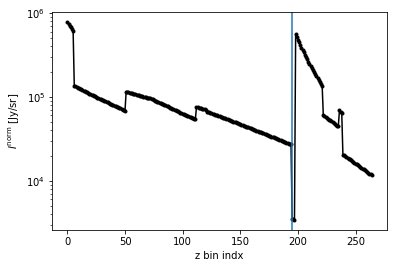

In [27]:
plt.plot(I_norm, 'k.-')
plt.axvline(len(sp2))
plt.xlabel('z bin indx')
plt.ylabel(r'$I^{\rm norm}$ [Jy/sr]')
plt.yscale('log')

### run MP (trial)

In [ ]:
sigI = 5e3#2.4e4
e_th = sigI
sig_th = 3

In [32]:
Ipred_targ_arr = np.zeros([1]+list(Itrue_targ.shape))
for i in range(1):
    Iobs_all = Itrue_all + np.random.normal(0, sigI, Itrue_all.shape)
    N_pred = run_MP_sig(A, I_norm, Iobs_all, sigI, sig_th)
    _, Ipred_targ = gen_Ipred\
        (z_coords[sp2], N_pred[:,sp2], dth, nu_binedges, line_use, line_targ_vec, verbose = 0)    
    Ipred_targ_arr[i] = Ipred_targ

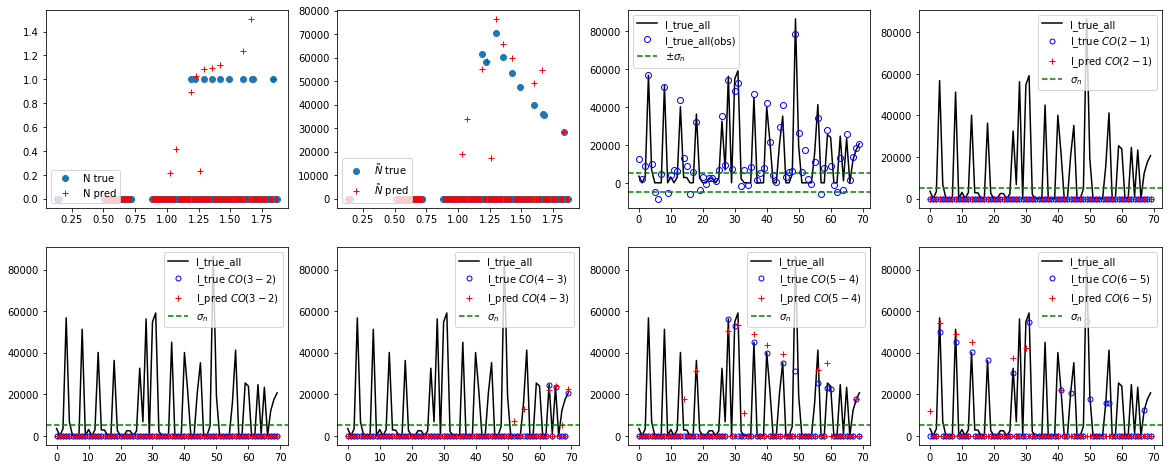

In [33]:
fig, ax = plt.subplots(2,4,figsize = (20,8))

ax[0][0].plot(z_coords[sp2], N_true[0,:],'o',label='N true')
ax[0][0].plot(z_coords[sp2], N_pred[0],'r+',label='N pred')
ax[0][0].legend(loc = 3)

ax[0][1].plot(z_coords[sp2], N_true[0,:]*I_norm[sp2],'o',label=r'$\tilde{N}$ true')
ax[0][1].plot(z_coords[sp2], N_pred[0,sp2]*I_norm[sp2],'r+',label=r'$\tilde{N}$ pred')
ax[0][1].legend(loc = 3)


ax[0][2].plot(Itrue_all[0,:],'k-', markerfacecolor='None',label='I_true_all')
ax[0][2].plot(Iobs_all[0,:],'bo', markerfacecolor='None',label='I_true_all(obs)')
ax[0][2].axhline(sigI, ls = '--', c = 'g', label = r'$\pm\sigma_n$')
ax[0][2].axhline(-sigI, ls = '--', c = 'g')
ax[0][2].legend(loc = 0)

targ_idx = 1
ax[0][3].plot(Itrue_all[0,:],'k-', label='I_true_all')
ax[0][3].plot(Itrue_targ[targ_idx,0,:],'bo', markerfacecolor='None', markersize = 5, 
           label='I_true ' + line_name_arr[targ_idx])
ax[0][3].plot(Ipred_targ[targ_idx,0,:],'r+', label='I_pred ' + line_name_arr[targ_idx])
ax[0][3].axhline(sigI, ls = '--', c = 'g', label = r'$\sigma_n$')
ax[0][3].legend(loc = 0)

targ_idx = 2
ax[1][0].plot(Itrue_all[0,:],'k-', label='I_true_all')
ax[1][0].plot(Itrue_targ[targ_idx,0,:],'bo', markerfacecolor='None', markersize = 5, 
           label='I_true ' + line_name_arr[targ_idx])
ax[1][0].plot(Ipred_targ[targ_idx,0,:],'r+', label='I_pred ' + line_name_arr[targ_idx])
ax[1][0].axhline(sigI, ls = '--', c = 'g', label = r'$\sigma_n$')
ax[1][0].legend(loc = 0)

targ_idx = 3
ax[1][1].plot(Itrue_all[0,:],'k-', label='I_true_all')
ax[1][1].plot(Itrue_targ[targ_idx,0,:],'bo', markerfacecolor='None', markersize = 5, 
           label='I_true ' + line_name_arr[targ_idx])
ax[1][1].plot(Ipred_targ[targ_idx,0,:],'r+', label='I_pred ' + line_name_arr[targ_idx])
ax[1][1].axhline(sigI, ls = '--', c = 'g', label = r'$\sigma_n$')
ax[1][1].legend(loc = 0)

targ_idx = 4
ax[1][2].plot(Itrue_all[0,:],'k-', label='I_true_all')
ax[1][2].plot(Itrue_targ[targ_idx,0,:],'bo', markerfacecolor='None', markersize = 5, 
           label='I_true ' + line_name_arr[targ_idx])
ax[1][2].plot(Ipred_targ[targ_idx,0,:],'r+', label='I_pred ' + line_name_arr[targ_idx])
ax[1][2].axhline(sigI, ls = '--', c = 'g', label = r'$\sigma_n$')
ax[1][2].legend(loc = 0)

targ_idx = 5
ax[1][3].plot(Itrue_all[0,:],'k-', label='I_true_all')
ax[1][3].plot(Itrue_targ[targ_idx,0,:],'bo', markerfacecolor='None', markersize = 5, 
           label='I_true ' + line_name_arr[targ_idx])
ax[1][3].plot(Ipred_targ[targ_idx,0,:],'r+', label='I_pred ' + line_name_arr[targ_idx])
ax[1][3].axhline(sigI, ls = '--', c = 'g', label = r'$\sigma_n$')
ax[1][3].legend(loc = 0)